In [1]:
from urllib import request
import re, datetime, time 

from pytesseract import image_to_string
from PIL import Image, ImageDraw, ImageOps
from IPython.core.display import Image as Img, display

urlSSO = 'https://webapp.yuntech.edu.tw/YunTechSSO/Account/Login?lang=zh-TW'
urlCaptcha = 'https://webapp.yuntech.edu.tw/YunTechSSO/ImageValidationHandler.ashx?_dc='
    
def getImage():
    timestamp = (int)(datetime.datetime.now().timestamp() * 1000)
    res = request.urlretrieve(urlCaptcha + str(timestamp), './ValidationCodes/%s.jpg' % str(timestamp))
    image = Image.open('./ValidationCodes/%s.jpg' % str(timestamp))
    display(image)
    imageInv = ImageOps.invert(image)
    return imageInv, str(timestamp)


In [2]:
def getPixel(image,x,y,G,N):  
    L = image.getpixel((x,y))  
    if L > G:  
        L = True  
    else:  
        L = False  
  
    nearDots = 0  
    if L == (image.getpixel((x - 1,y - 1)) > G):  
        nearDots += 1  
    if L == (image.getpixel((x - 1,y)) > G):  
        nearDots += 1  
    if L == (image.getpixel((x - 1,y + 1)) > G):  
        nearDots += 1  
    if L == (image.getpixel((x,y - 1)) > G):  
        nearDots += 1  
    if L == (image.getpixel((x,y + 1)) > G):  
        nearDots += 1  
    if L == (image.getpixel((x + 1,y - 1)) > G):  
        nearDots += 1  
    if L == (image.getpixel((x + 1,y)) > G):  
        nearDots += 1  
    if L == (image.getpixel((x + 1,y + 1)) > G):  
        nearDots += 1  
  
    if nearDots < N:  
        return image.getpixel((x,y-1))  
    else:  
        return None  
    

In [25]:
def clearNoise(image, G, N, Z):  
    draw = ImageDraw.Draw(image)  
  
    for x in range(0, image.size[0] - 1):
        draw.point((x, 0), 255)
        draw.point((x, image.size[1] - 1), 255)
    for y in range(0, image.size[1] - 1):
        draw.point((0, y), 255)
        draw.point((image.size[0] - 1, y), 255)
        
    for i in range(0,Z):  
        for x in range(1, image.size[0] - 1):  
            for y in range(1, image.size[1] - 1):  
                color = getPixel(image,x,y,G,N)  
                if color != None:  
                    draw.point((x,y),color)
                    

In [27]:
def imageToString(img):
    string = image_to_string(img)
    #string =re.sub('\W', '', string)
    return string


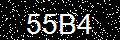

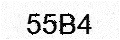

55B4


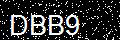

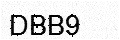

DBB9


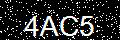

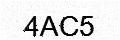

4AC5


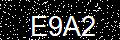

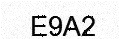

E9A2


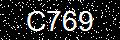

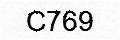

C769


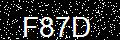

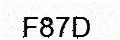

F87D


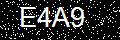

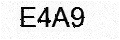

E4A9


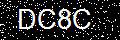

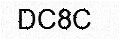

DCSC


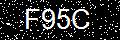

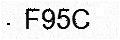

- F950


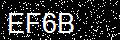

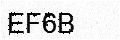

EFGB


In [29]:
for each in range(10):
    image, timestamp = getImage()
    image = image.convert('L')
    clearNoise(image, 125, 3, 6) 
    display(image)
    image.save('./TIFF_Inv/%s.tif' % str(timestamp), 'tiff')
    print(imageToString(image))
    time.sleep(1)
    